These problems will help you practice solving integration problems. They are optional, and they will not be graded. Some of them are from past quizzes and exams. You should eventually be able to solve these kinds of problems in about 20 minutes.



## Integrating a batch reactor design equation



For a constant volume batch reactor where $A \rightarrow B$ at a rate of $-r_A = k C_A^2$, we derive the following design equation for the length of time required to achieve a particular level of conversion :

$t(X) = \frac{1}{k C_{A0}} \int_{X=0}^X \frac{dX}{(1-X)^2}$

if $k = 10^{-3}$ L/mol/s and $C_{A0}$ = 1 mol/L, estimate the time to achieve 90% conversion.

*The answer is 9000 seconds.*



In [93]:
from scipy.integrate import simps, quad
import numpy as np
import matplotlib.pyplot as plt

def integrand(x):
    return 1/(1-x)**2
k = 1e-3 #L/mol/s
CA0 = 1 #mol/L
x = np.linspace(0,0.9,1000)
y = integrand(x)
time1 = 1/k/CA0*np.trapz(y,x)
time2 = 1/k/CA0*simps(integrand(x),x)
time3 = 1/k/CA0*quad(integrand,0,0.9)[0]
print(time1, time2, time3)

9000.135132939517 9000.00180425278 9000.000000000007


## Integration of the heat capacity



From thermodynamics, the heat capacity is defined as $C_p = \left(\frac{dH}{dT}\right)_P$. That means we can calculate the heat required to change the temperature of some material from the following integral:

$H_2 - H_1 = Q = \int_{T_1}^{T_2} C_p(T) dT$

In the range of 298-1200K, the heat capacity of CO<sub>2</sub> is given by a [Shomate polynomial](https://webbook.nist.gov/cgi/cbook.cgi?ID=C124389&Units=SI&Mask=1#Thermo-Gas):

$C_p(t) = A + B t + C t^2 + D t^3 + E/t^2$ with units of J/mol/K.

where $t = T / 1000$, and $T$ is the temperature in K. The constants in the equation are

| |value|
|---|---|
| A|24.99735|
| B|55.18696|
| C|-33.69137|
| D|7.948387|
| E|-0.136638|
| F|-403.6075|
| G|228.2431|
| H|-393.5224|



### Integrate the heat capacity



Use this information to compute the energy (Q in kJ/mol) required to raise the temperature of CO<sub>2</sub> from 300K to 600K. You should use `scipy.integrate.quad` to perform the integration.

*The change in enthalpy is 12.841 kJ/mol.*



In [144]:
A =  24.99735
B =  55.18696
C = -33.69137
D =  7.948387
E = -0.136638
F = -403.6075
G =  228.2431
H = -393.5224

def shomate(T, *args):
    t = T/1000
    return A + B*t + C*t**2 + D*t**3 + E/t**2 #J/mol/K, T in Kelvin

Q = quad(shomate, 300, 600, args = (A, B, C, D, E))

## Generalized factorial function



The &Gamma; function is defined by:

$\Gamma(x) = \int_0^\infty e^{-t}t^{x-1} dt$

It is a generalized factorial function. When the arguments to the function are integers, the following relation is true:

$\Gamma(n + 1) = n!$

Show that this is true for the first 10 integers starting from 0. You can use the `math.factorial` function.



In [26]:
from math import factorial

def g_integrand(t, x):
    return np.exp(-t)*t**(x-1)

compare = []
for value in range(0,10):
    test1 = quad(g_integrand, 0, np.Infinity, args = (value + 1))
    test2 = factorial(value)
    compare.append([int(round(test1[0],0)),test2])
print(compare)


[[1, 1], [1, 1], [2, 2], [6, 6], [24, 24], [120, 120], [720, 720], [5040, 5040], [40320, 40320], [362880, 362880]]


## Legendre polynomials



The Legendre polynomials are defined by:

$P_n(x) = \sum_{m=0}^M (-1)^m \frac{(2n - 2m)!}{2^n m! (n-m)!(n - 2m)!} x^{n-2m}$

where $M= n/2$ if n is even or $(n-1) / 2$ if $n$ is odd. $m!$ means "the factorial of m", for example, 4! = 1 \* 2 \* 3 \* 4 = 24. You can compute it like this:



In [27]:
from math import factorial

24

Here is a helpful function to compute $M$:



In [29]:
import numpy as np
def M(n):
    if np.mod(n, 2) == 0:  # this means n is even.
        return int(n / 2)
    else:
        return int((n - 1) / 2)

Write a function that computes `P(x, n)`, and plot the function for `n=3` and `n=4` on the range of x=-1 to x=1.



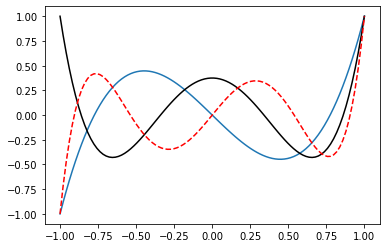

In [104]:
def P(x, n):
    Mlim = M(n)
    for m in range(0,Mlim+1):
        Pval = (-1)**m * factorial((2*n - 2*m)) / (2**n * factorial(m) * factorial(n-m) * factorial(n-2*m)) * x**(n - 2*m)
        if m == 0:
            Ptemp = Pval
        else:
            Ptemp = np.column_stack((Ptemp, Pval))
    #print(Ptemp)
    return np.sum(Ptemp, axis = 1)
x = np.linspace(-1,1,100)
plt.plot(x, P(x,3))
plt.plot(x, P(x,4), 'k')
plt.plot(x, P(x,5), 'r--')

These polynomials are *orthogonal* on the domain of x=-1 to 1, which means:

$\int_{-1}^{1} P_3(x) P_4(x) dx = 0$

Show that is true using your function.



In [108]:
def integrand(x):
    return (P(x,3)*(P(x,4)))
quad(integrand, -1, 1)

(0.0, 2.220806842285256e-15)

## Statistics



The normal distribution is defined by:

$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-0.5 (x - \mu)^2/\sigma^2}$

In this equation, &mu; is the average, and &sigma; is the standard deviation of the distribution. For this problem, let &mu;=0, and &sigma;=1.

One property of this distribution is that $\int_{-\infty}^{\infty}  f(x) dx = 1$. Show that this is true by evaluating the integral.



(0.9999999999999997, 1.017819144086152e-08)


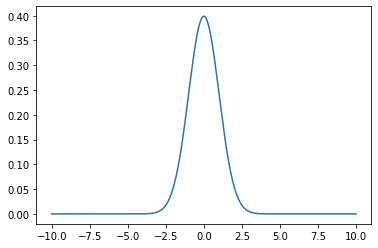

In [126]:
def normal(x, mu, sigma):
    return 1/sigma/np.sqrt(2*np.pi)*np.exp(-0.5*(x - mu)**2/sigma**2)
mu = 0
sigma = 1
x = np.linspace(-10,10,1000)
print(quad(normal, np.NINF, np.Inf, args = (mu, sigma)))
plt.plot(x, normal(x,mu,sigma))

There is a guideline that &plusmn; 2&sigma; represents 95% of the distribution, i.e. it defines a 95% confidence interval. Find an approximate solution by trial and error for $x$ to this equation, which represents a symmetric fraction of the distribution that covers 95% of the area. Compare your answer to the guideline.

$0.95 = \int_{-x}^{x} f(x) dx$

*Hint, x is close to 2.*



In [140]:
import scipy.optimize as opt
retval = lambda x: (quad(normal, -x, x, args = (mu, sigma))[0] - 0.95)
sol = opt.newton(retval, 2)
print(sol)
print(retval(sol) + 0.95)

1.9599639845400543
0.9500000000000001


The mean of a continuous distribution is defined by $\mu = \int_{-\infty}^{\infty} x f(x) dx$. Show that the average of the normal distribution as defined above is zero by evaluating this integral.



In [142]:
integrand = lambda x: x*normal(x, mu, sigma)
quad(integrand, np.NINF, np.Inf)

(0.0, 0.0)

The variance, $\sigma^2$ is defined by $\sigma^2 = \int_{-\infty}^{\infty} (x - \mu)^2 f(x) dx$. Show that the variance of the normal distribution as defined above is one by evaluating this integral. Note that &mu;=0 by the definitions above.



In [143]:
integrand = lambda x: (x - mu)**2*normal(x, mu, sigma)
quad(integrand, np.NINF, np.Inf)

(1.000000000000001, 5.274099961840485e-09)

## Related topics



Review the functions at [https://docs.scipy.org/doc/scipy/reference/integrate.html>](https://docs.scipy.org/doc/scipy/reference/integrate.html>)to learn more about what kinds of integration routines exist.

